In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## GOLD prices prediction with Regression and Decission tree models, Feature engineering, EDA 
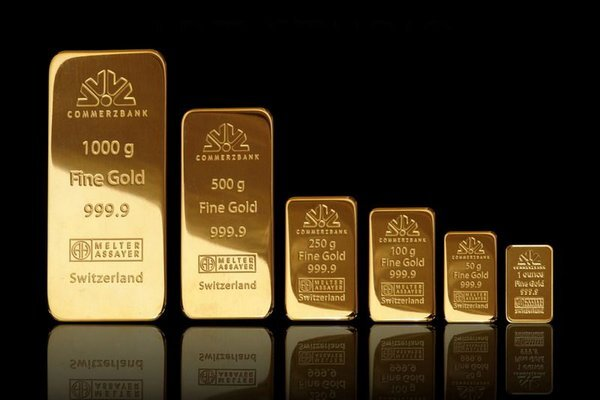

## The main goal is: 
to see how Crude oil price, interest rate (repo rate), Indian currency price in dollars, Sensex (BSE), Inflation rate and US Dollar index **will follow a relationship with the gold price**.

The business decision which are dependent on the prices of such commodities can make benefits from a feasible prediction. We will have a brief view over the error mean square values of the regression model which will guide us about the predictive ability of the predictive model . The data is wide spread across the time and is available from dated 1st October 2000 to 1 August 2020.

In [2]:
# All the imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
# from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
# import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
gold = pd.read_csv('https://github.com/girzad/SDA_PP_R/blob/dc45b722e339e9406b7222aa406baa528b87a41f/GoldUP.csv?raw=true')

In [4]:
print('Shape of this DataFrame is:', gold.shape)
gold.head()

Shape of this DataFrame is: (239, 8)


,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.0,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.0,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.5,46.514595,4247.04,36.73,112.01


**Column definitions:**
 - Date - Monthly Data from October 2000 to August 2020;
 - Gold_Price - Gold Prices for the same period;
 - Crude_Oil - Crude Oil Prices;
 - Interest_Rate - Interest rate;
 - USD_INR - Exchange rate of Dollar to Rupees;
 - Sensex - Sensex Value, indicating the relative prices of shares on the Mumbai (Bombay) Stock Exchange;
 - CPI - Consumer Price Index;
 - USD_Index - US Dollar Index.

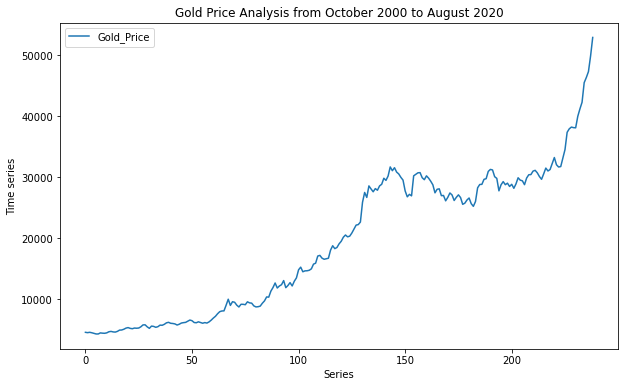

In [5]:
gold.Date = pd.to_datetime(gold.Date)
price = pd.DataFrame(data=gold['Gold_Price'], columns=['Gold_Price']).dropna()
price.plot(figsize=(10,6))
plt.ylabel('Time series')
plt.xlabel('Series')
plt.title('Gold Price Analysis from October 2000 to August 2020')
plt.show()

In [6]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           239 non-null    datetime64[ns]
 1   Gold_Price     239 non-null    int64         
 2   Crude_Oil      239 non-null    float64       
 3   Interest_Rate  239 non-null    float64       
 4   USD_INR        239 non-null    float64       
 5   Sensex         239 non-null    float64       
 6   CPI            239 non-null    float64       
 7   USD_Index      239 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 15.1 KB


In [8]:
from pandas_profiling import ProfileReport
profile = ProfileReport(gold, title="Gold Dataset", html={'style': {'full_width':
                        True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# def plot_hist(x):
#     plt.figure(figsize=(12,5))
#     plt.tight_layout()
#     sns.histplot(x)
#     plt.show()

# plot_hist(gold['Gold_Price'])

In [14]:
# gold["ln_price"] = np.log(gold.Gold_Price)
# plot_hist(gold['ln_price'])

C:\Users\simon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.2488536311924413
Kurtosis: -0.995847


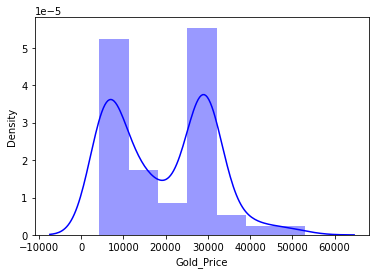

In [11]:
sns.distplot(gold['Gold_Price'], color = 'blue')
print('Skewness: %f', gold['Gold_Price'].skew())
print("Kurtosis: %f" % gold['Gold_Price'].kurt())

## Testing statsmodels.api

In [17]:
y = gold.Gold_Price
X = gold['CPI']

In [19]:
import statsmodels.api as sm 
x_train = sm.add_constant(X)

C:\Users\simon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
model = sm.OLS(y, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Gold_Price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2717.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):          7.83e-132
Time:                        09:55:51   Log-Likelihood:                -2275.3
No. Observations:                 239   AIC:                             4555.
Df Residuals:                     237   BIC:                             4562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8911.8340    582.067    -15.311      0.000   -1.01e+04   -7765.148
CPI          384.4911      7.376     52.126      0.000     369.960     399.022
==============================================================================
Omnibus:                       43.859   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.817
Skew:                           1.130   Prob(JB):                     2.29e-14
Kurtosis:                       4.096   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Functions to validate our models

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

def mae(y_test, y_pred):
    return round(mean_absolute_error(y_test, y_pred), 3)

def my_mae(y_test, y_pred):
    mae = sum(np.abs(y_test-y_pred))/len(y_test)
    return round(mae, 3)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 3)

def wmape(y_test, y_pred):
    wmape = sum(np.abs(y_test-y_pred)) / sum(np.abs(y_test))
    return round(wmape, 4)